In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [52]:
df= pd.read_csv('SMSSpamCollection', sep='\t',names=["label", "message"])  #giving index column name to ech columns

In [53]:
df.head()  #printing top 5 rows

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.shape

(5572, 2)

## Text preprocessing

In [63]:
#In text pre processing we do following steps
#removing html tags
#removing punctuations
#removing stop words
#lematize and stem the word
import string
lemma=WordNetLemmatizer()
filtered_data=[]
stop_words=set(stopwords.words("english"))
for i in range(0,len(df)):
    cleaned=re.sub('[^a-zA-z]',' ',df['message'][i])
    cleaned=cleaned.lower()
    cleaned=cleaned.split()
    cleaned=[lemma.lemmatize(word,pos="v") for word in cleaned if word not in stop_words]
    cleaned=" ".join(cleaned)
    filtered_data.append(cleaned)


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(binary=True,ngram_range=(1,2))
X=count_vect.fit_transform(filtered_data)
y=df["label"].map({"ham":0,"spam":1})

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4457, 36040)
(4457,)
(1115, 36040)
(1115,)


In [100]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve
print(accuracy_score(y_test,y_predict))

0.97847533632287


In [117]:
import scikitplot as splt

In [118]:
y_pred_prob=model.predict_proba(X_test)

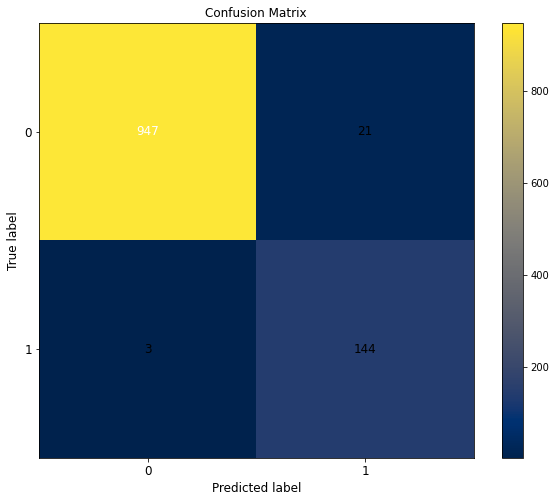

In [131]:
splt.metrics.plot_confusion_matrix(y_test,y_predict,figsize=(10,8),cmap='cividis',text_fontsize="large")
plt.show()

c:\programdata\anaconda3\envs\project1\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


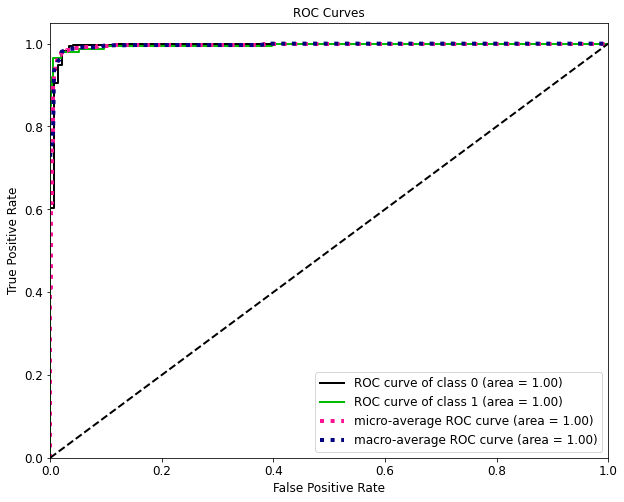

In [136]:
splt.metrics.plot_roc_curve(y_test,y_pred_prob,figsize=(10,8),text_fontsize="large")
plt.show()

In [140]:
result=pd.DataFrame({"Actual":y_test,"predicted":y_predict})
result.head(20)

,Actual,predicted
1078,0,0
4028,0,0
958,0,0
4642,0,0
4674,0,0
5461,0,0
4210,0,0
4216,0,0
1603,0,0
1504,0,0


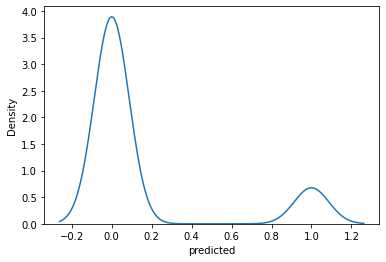

In [145]:
sns.kdeplot(result["predicted"])
plt.show()